# Import data and set default options

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix 
from scipy.stats import randint

# import lazypredict
# from lazypredict.Supervised import LazyRegressor

df1 = pd.read_csv('data/sm_data_features.csv')

# set default options for libraries:

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

sns.set(rc={"figure.dpi":200, 'savefig.dpi':200})
sns.set_style("white")
sns.set_palette("mako")

In [2]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6809 entries, 0 to 6808
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ChEMBL ID         6809 non-null   object 
 1   InChI Key         6809 non-null   object 
 2   Name              6809 non-null   object 
 3   SMILES            6809 non-null   object 
 4   Type              6809 non-null   object 
 5   Max Phase         6809 non-null   float64
 6   Targets           6809 non-null   float64
 7   Bioactivities     6809 non-null   float64
 8   MW                6809 non-null   float64
 9   LogP              6809 non-null   float64
 10  MolMR             6809 non-null   float64
 11  H Donors          6809 non-null   float64
 12  H Acceptors       6809 non-null   float64
 13  TPSA              6809 non-null   float64
 14  Heavy Atom Count  6809 non-null   float64
 15  Aromatic Rings    6809 non-null   float64
 16  Rotatable Bonds   6809 non-null   float64


# Prepare dataset and train ML model

In [3]:
#preprocess data, specifically the target
df1['Max Phase'] = df1['Max Phase'].map({1:0,2:1,3:2,4:3})

#classify features and the final target
X = df1[['Targets', 'Bioactivities', 'MW', 'LogP', 'MolMR', 'H Donors',
       'H Acceptors', 'TPSA', 'Heavy Atom Count', 'Aromatic Rings',
       'Rotatable Bonds', 'Ring Count']]
Y = df1['Max Phase']

#split dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [4]:
#set up and train model
rf = RandomForestClassifier(n_estimators=3000)
rf.fit(X_train, Y_train)

#set up prediction values
Y_pred = rf.predict(X_test)

In [5]:
#Improve hyperparameters for the classifier model
#The code below is used in case we want to explore model optimization. 
#This is usually not needed as the classifier does a good job for this dataset.

    # param_dist = {'n_estimators': randint(50,300),
    #               'max_depth': randint(1,20)}

    # # Create a random forest classifier
    # rf = RandomForestClassifier()

    # # Use random search to find the best hyperparameters
    # rand_search = RandomizedSearchCV(rf, 
    #                                  param_distributions = param_dist, 
    #                                  n_iter=5, 
    #                                  cv=5)

    # # Fit the random search object to the data
    # rand_search.fit(X_train, Y_train)

    # # Create a variable for the best model
    # best_rf = rand_search.best_estimator_

    # # Print the best hyperparameters
    # print('Best hyperparameters:',  rand_search.best_params_)

# Evaluate the model

In [6]:
#General prediction scores
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='micro')
recall = recall_score(Y_test, Y_pred, average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.5748898678414097
Precision: 0.5748898678414097
Recall: 0.5748898678414097


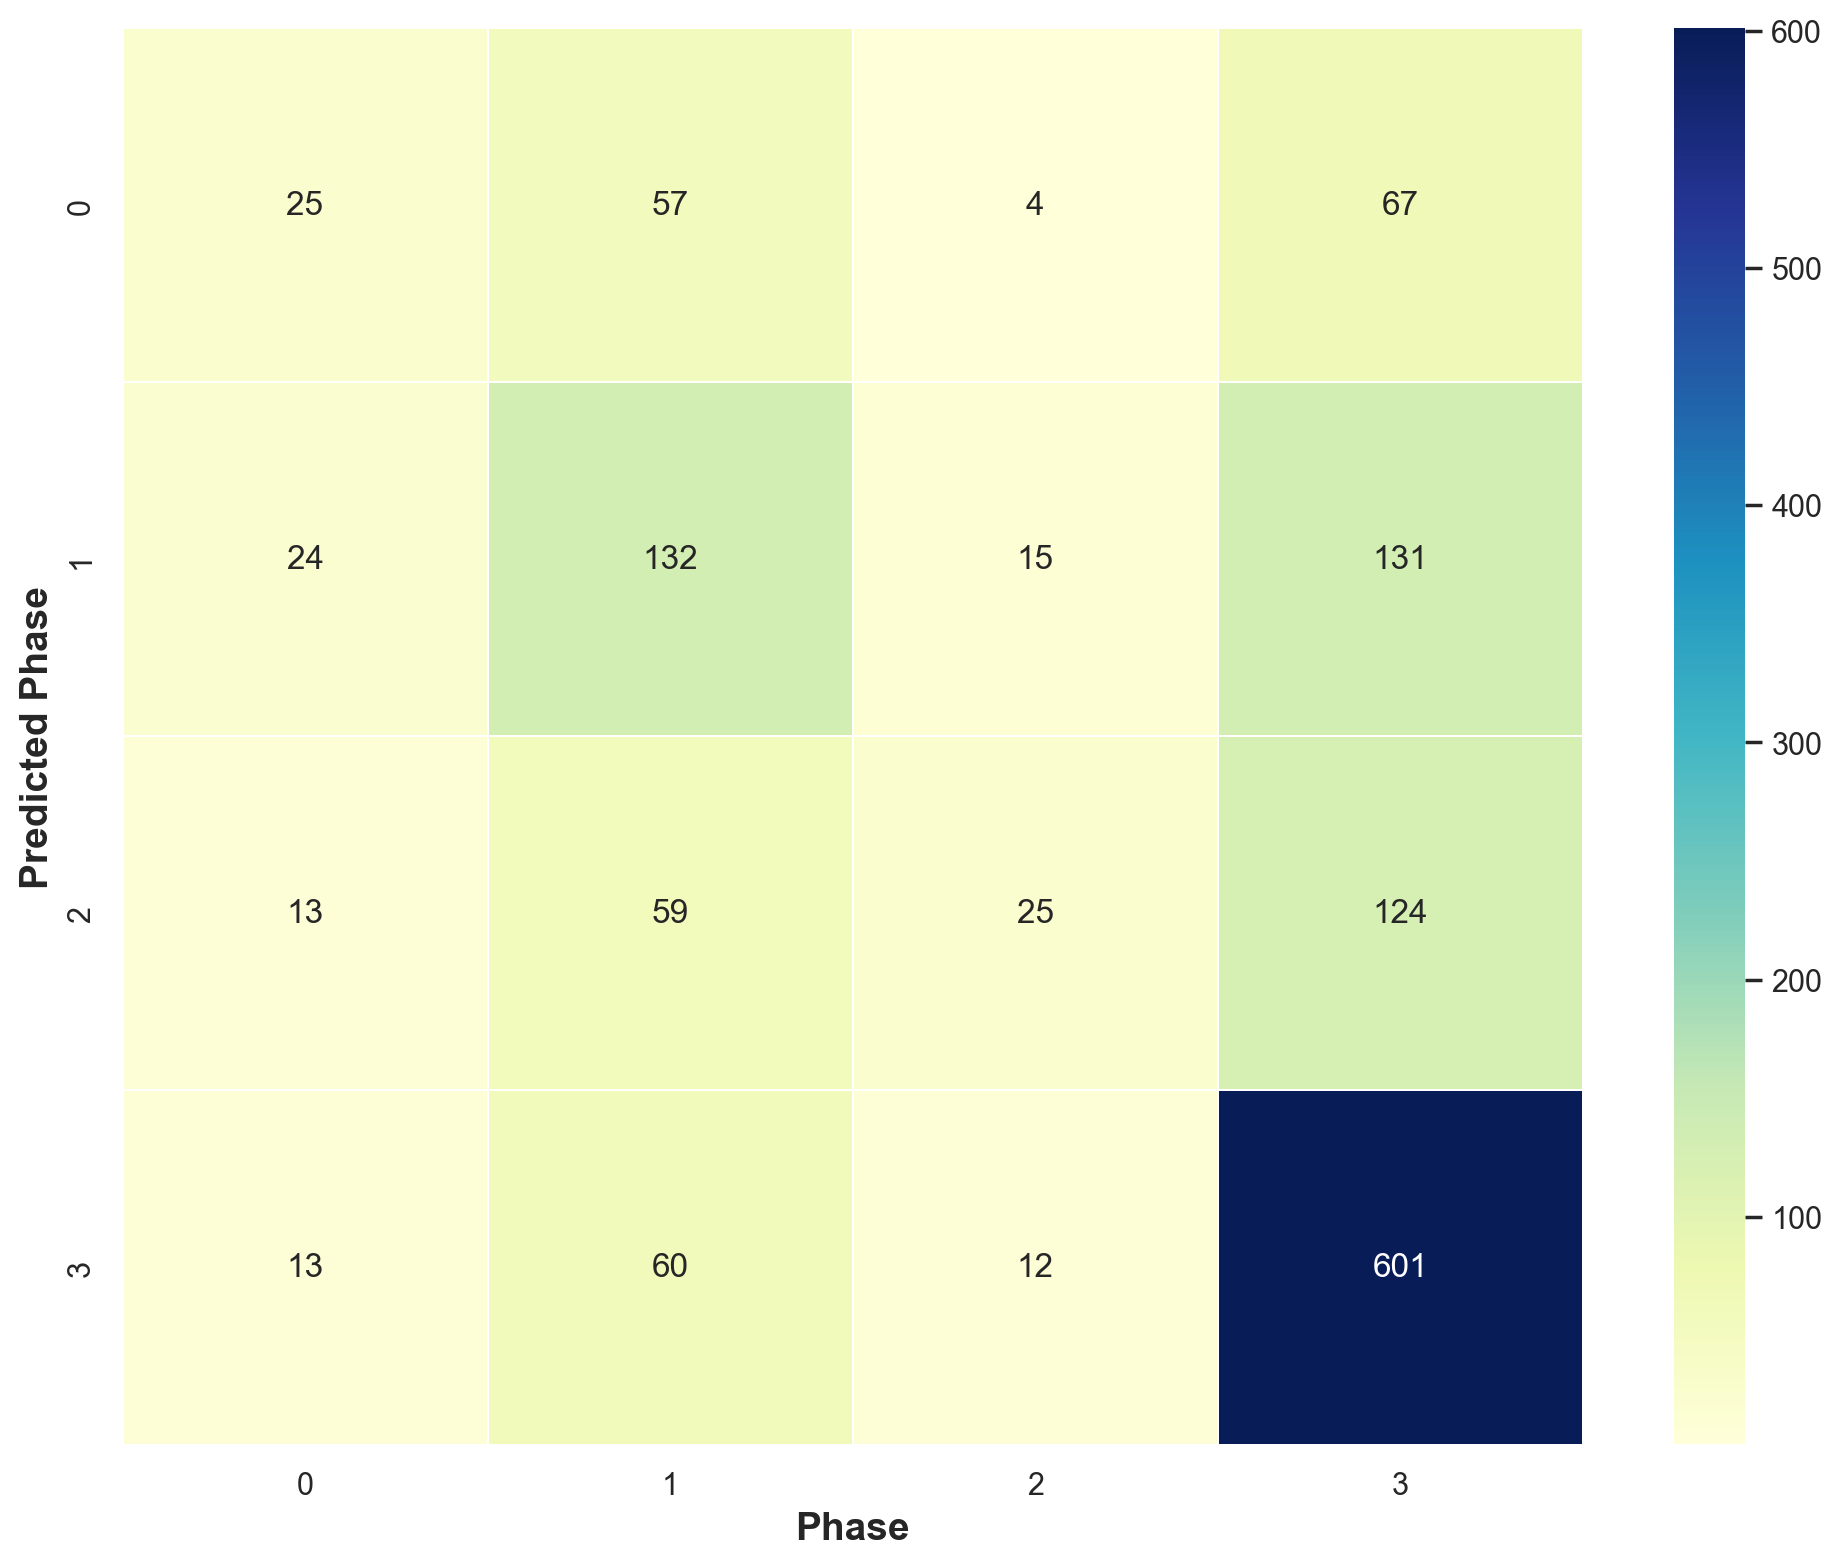

In [7]:
#confusion matrix to compare actual and predicted targets
cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(10,8))

sns.heatmap(cm, linewidth=.1, annot=True, fmt='g', cmap='YlGnBu')
plt.xlabel('Phase', fontsize=14, fontweight='bold')
plt.ylabel('Predicted Phase', fontsize=14, fontweight='bold')
plt.tight_layout()

plt.show()

#ConfusionMatrixDisplay(confusion_matrix=cm).plot()

#Phase1 = 0, Phase2 = 1, Phase3 = 2, Approved = 3

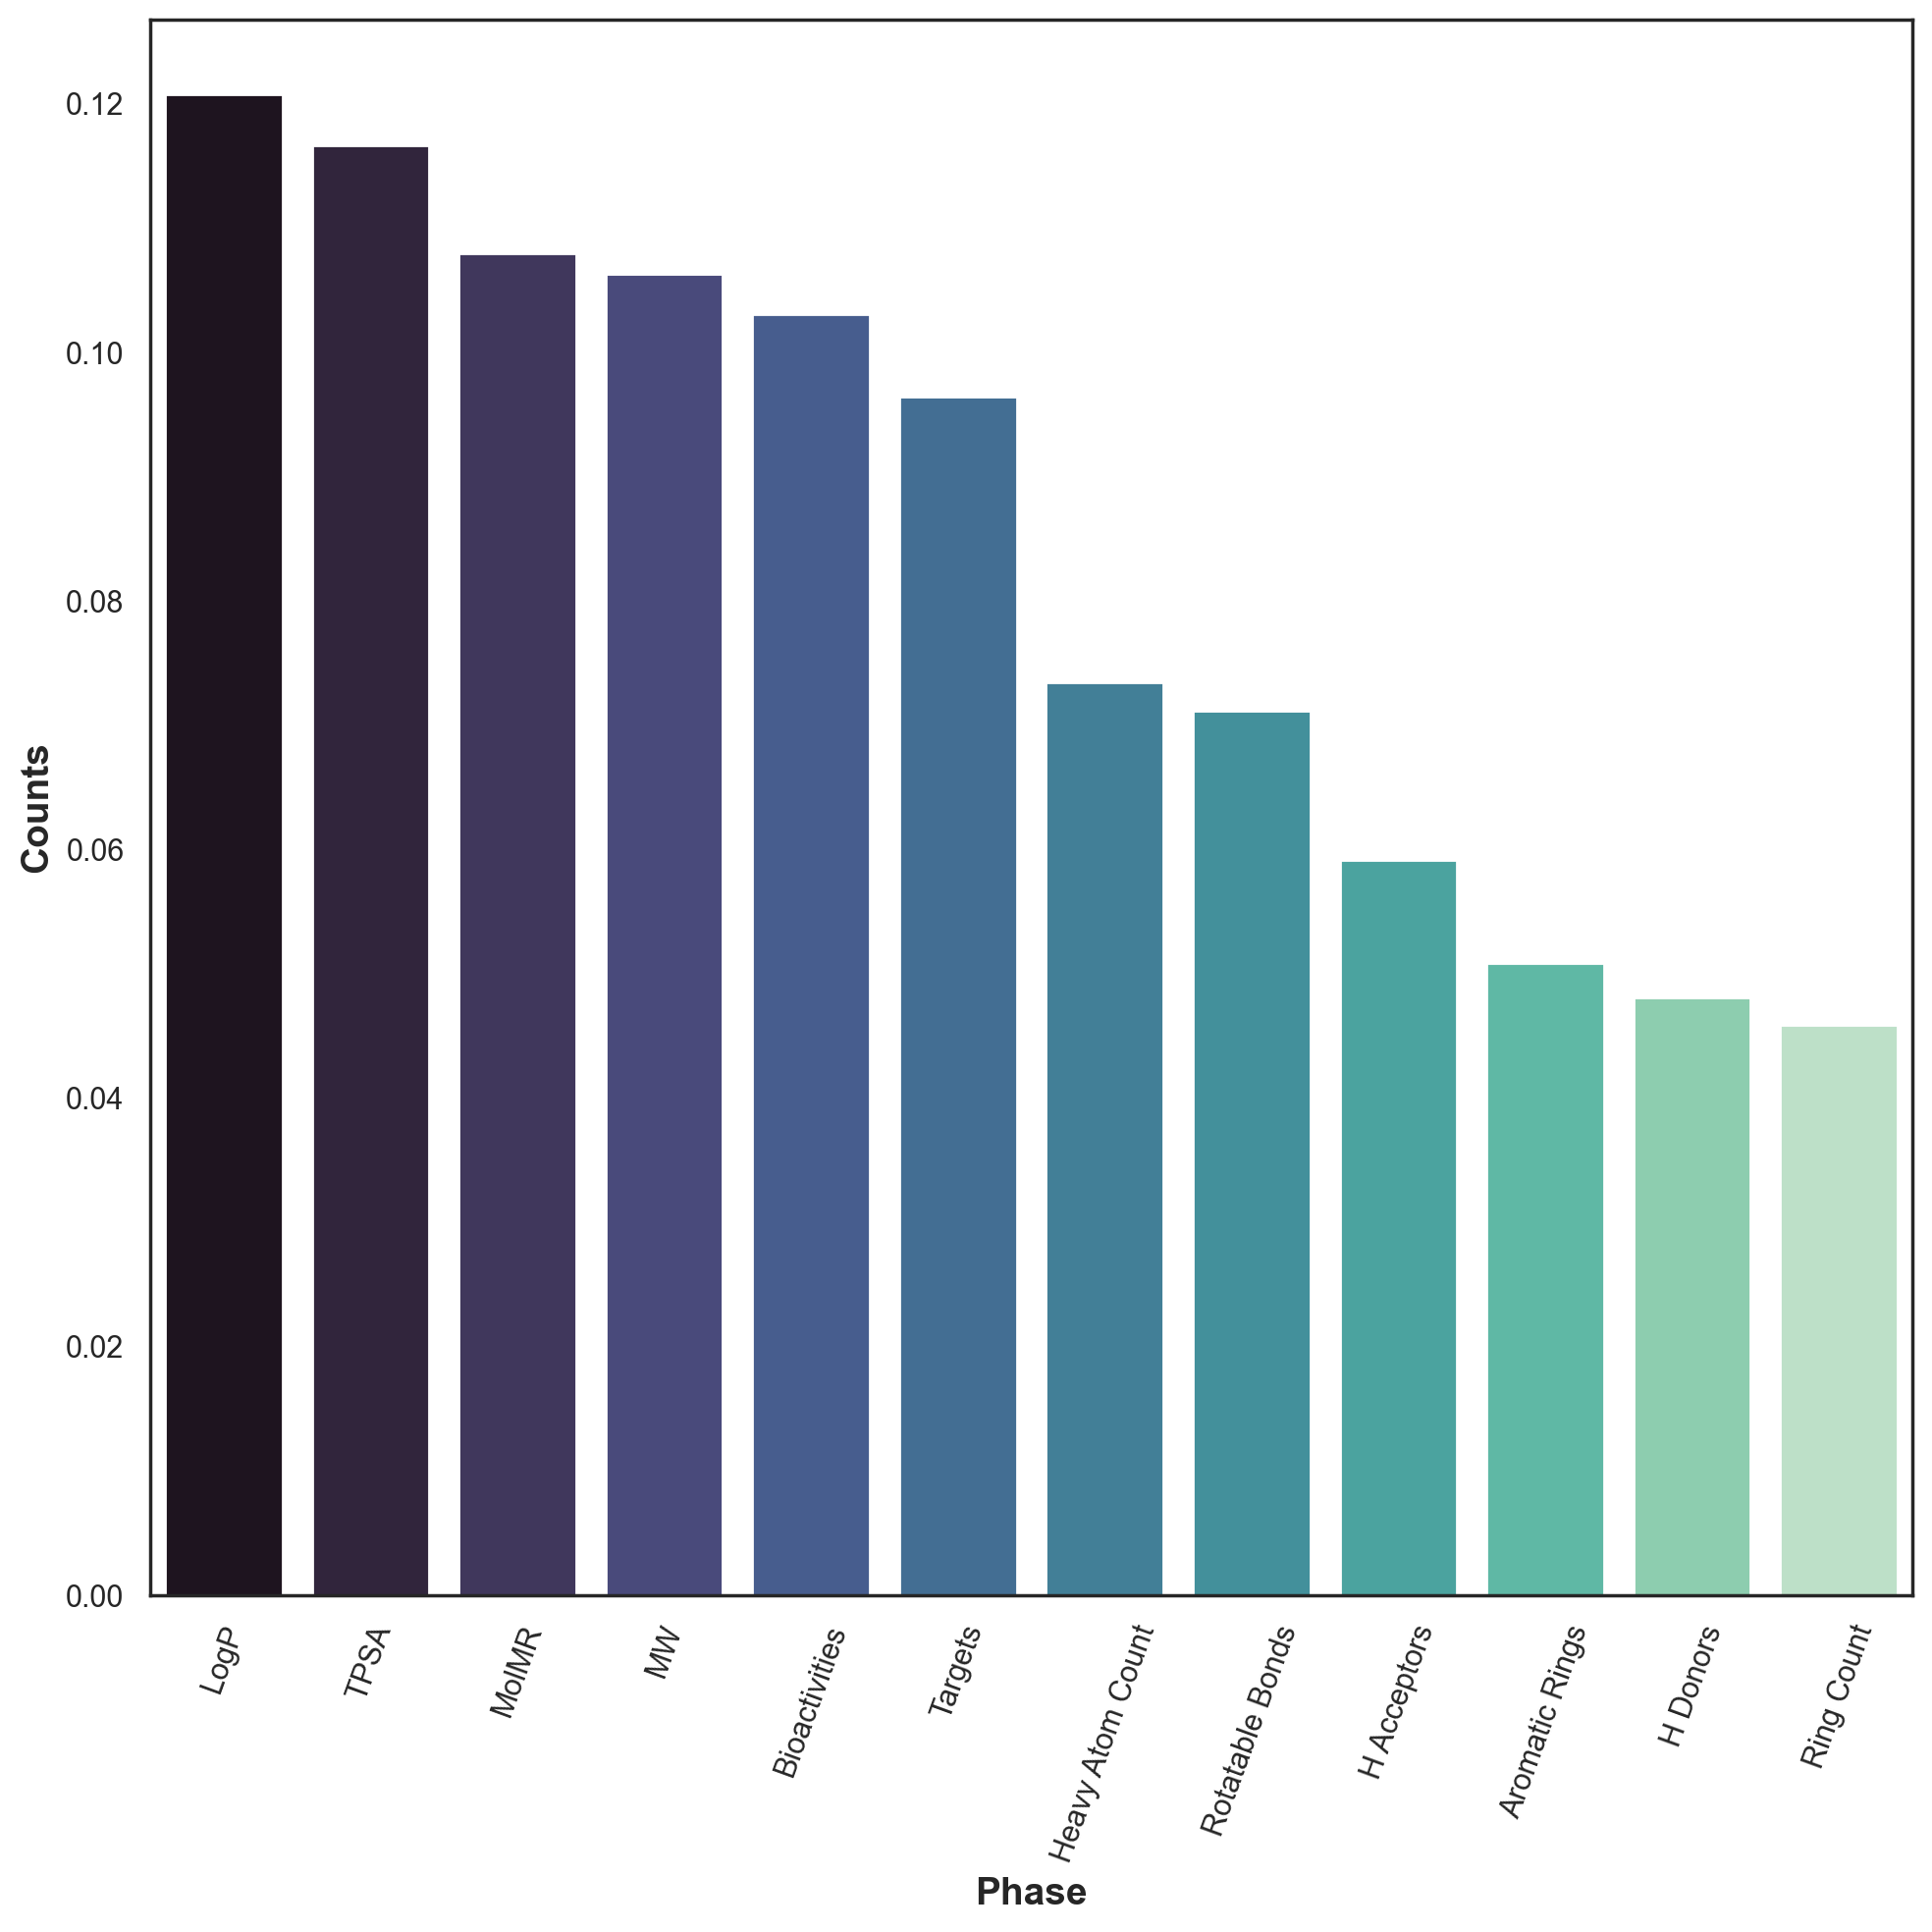

In [8]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

df2 = pd.DataFrame(feature_importances)
df2.reset_index(inplace=True)
df2.rename(columns={'index':'Feature', 0:'Value'}, inplace=True)
df2

# Plot a simple bar chart
plt.figure(figsize=(10,10))

sns.barplot(data=df2, x='Feature', y='Value', palette='mako')
plt.xlabel('Phase', fontsize=14, fontweight='bold')
plt.ylabel('Counts', fontsize=14, fontweight='bold')
plt.xticks(rotation=70)
plt.tight_layout()

plt.show()

# Summary

### The machine learning model provides an accuracy of around 57.5% for this dataset. Based on the confusion matrix data, this model is bad at predicting the drug discovery stage for all but the 'Approved' stage which would explain the mediocre accuracy score. This suggests that the given molecular features are not adequate enough to predict clinical outcome. Still, for this model, the most important features are the LogP and TPSA values. The other features are also important as the feature importance scores are fairly evenly distributed.

### These models could potentially be optimized with additional molecular parameters or fingerprint features of the individual small molecules.